# IRIS DATASET

## A

The metrics that can be used for classifications are:
* accuracy
* precision and recall
* f1
* ROC
* confusion matrix

## B

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
irisDS = load_iris()
print(irisDS.data.shape)
type(irisDS)

(150, 4)


sklearn.utils._bunch.Bunch

In [3]:
df = pd.DataFrame(irisDS.data, columns = irisDS.feature_names)
df['target'] = irisDS.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
print(irisDS.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
X = irisDS.data[:,:4] # get all the data that is in the 1-4
y = irisDS.target
print(X.shape, y.shape)

(150, 4) (150,)


Text(0, 0.5, 'sepal width')

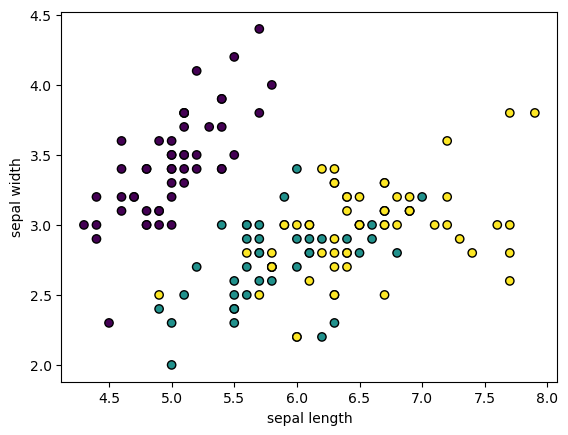

In [6]:
plt.scatter(X[:,0], X[:, 1], c=y, edgecolor="k")
plt.xlabel('sepal length')
plt.ylabel('sepal width')

Text(0, 0.5, 'petal width')

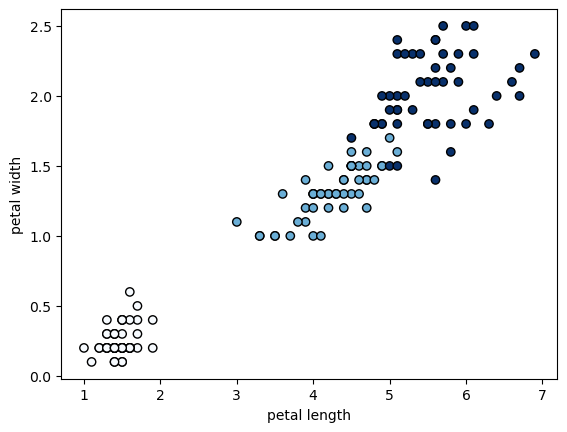

In [7]:
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Blues, edgecolors='k')
plt.xlabel("petal length")
plt.ylabel('petal width')

In [8]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(90, 4) (60, 4) (90,) (60,)


In [9]:
neigh_array = np.arange(1, 50)
neigh_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [10]:
acc_array = np.empty(shape=neigh_array.shape)
prec_array = np.empty(shape=neigh_array.shape)
rec_array = np.empty(shape=neigh_array.shape)
f1_array = np.empty(shape=neigh_array.shape)

# acc_array[1]

In [11]:
for idx, val in enumerate(neigh_array):
    knn = KNeighborsClassifier(n_neighbors=val, weights='distance')
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc_array[idx] = metrics.accuracy_score(y_test, pred)
    prec_array[idx] = metrics.precision_score(y_test, pred, average='weighted')
    rec_array[idx] = metrics.recall_score(y_test, pred, average='weighted')
    f1_array[idx] = metrics.f1_score(y_test, pred, average='weighted')


In [12]:
acc_array

array([0.91666667, 0.91666667, 0.93333333, 0.91666667, 0.95      ,
       0.93333333, 0.96666667, 0.93333333, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.95      , 0.95      ,
       0.91666667, 0.93333333, 0.91666667, 0.91666667, 0.91666667,
       0.91666667, 0.91666667, 0.91666667, 0.9       , 0.91666667,
       0.91666667, 0.93333333, 0.93333333, 0.93333333, 0.91666667,
       0.93333333, 0.91666667, 0.93333333, 0.91666667, 0.93333333,
       0.91666667, 0.93333333, 0.9       , 0.91666667, 0.91666667,
       0.93333333, 0.93333333, 0.93333333, 0.91666667, 0.93333333,
       0.91666667, 0.91666667, 0.91666667, 0.91666667])

Text(0.5, 0, 'Number of Neighbors')

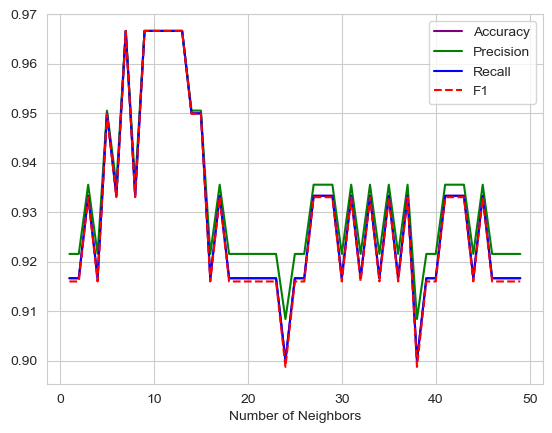

In [13]:
sns.set_style("whitegrid")
sns.lineplot(x=neigh_array, y=acc_array, color='purple', label='Accuracy')
sns.lineplot(x=neigh_array, y=prec_array, color='green', label='Precision')
sns.lineplot(x=neigh_array, y=rec_array, color='blue', label='Recall')
sns.lineplot(x=neigh_array, y=f1_array, color='red', linestyle='--', label='F1')             
             
             
plt.xlabel("Number of Neighbors")

# plt.legend(['Accuracy', 'Precision'])

In [14]:
acc_num = np.where(acc_array == max(acc_array))
# get indices
acc_num[0].tolist()



[6, 8, 9, 10, 11, 12]

In [15]:
prec_num = np.where(prec_array == max(prec_array))
prec_num[0].tolist()

[6, 8, 9, 10, 11, 12]

From the above line of code and figure, it can be seen that the optimal values are at n_neighbors= 7, 9, 11, 12, 13
It can also be seen in the above graph that the optimal value n does not depend on the validation strategy used as they give the same shape. However, the scores will changed depending on the validation strategy used. In this case the precision validation score gives the best result.

## C

In [16]:
from sklearn.svm import SVC

In [17]:
# iris dataset is linear so we will use the linear kernel
clf_svc = SVC(kernel='linear')
# train with only the training set
clf_svc.fit(X_train, y_train)
svc_pred = clf_svc.predict(X_test)
svc_acc = metrics.accuracy_score(y_test, svc_pred)
svc_prec = metrics.precision_score(y_test, svc_pred, average='weighted')
svc_recall = metrics.recall_score(y_test, svc_pred, average='weighted')
svc_f1 = metrics.f1_score(y_test, svc_pred, average='weighted')
[svc_acc, svc_prec, svc_recall, svc_f1]

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

In [18]:
print(metrics.confusion_matrix(y_test, svc_pred))

[[16  0  0]
 [ 0 22  1]
 [ 0  1 20]]
